# Diabetes in Pima Indian Women Coding

In [12]:
pip install keras

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install --upgrade tensorflow

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
     |████████████████████████████████| 394.3 MB 25 kB/s s eta 0:00:01
     |████████████████████████████████| 42 kB 4.9 MB/s  eta 0:00:01
     |████████████████████████████████| 14.8 MB 70.7 MB/s eta 0:00:01
     |████████████████████████████████| 65 kB 14.0 MB/s eta 0:00:01
     |████████████████████████████████| 3.8 MB 68.1 MB/s eta 0:00:01
     |████████████████████████████████| 6.0 MB 57.7 MB/s eta 0:00:01
     |████████████████████████████████| 129 kB 71.7 MB/s eta 0:00:01
     |████████████████████████████████| 462 kB 61.1 MB/s eta 0:00:

      Successfully uninstalled wheel-0.34.2
  Attempting uninstall: numpy
    Found existing installation: numpy 1.18.5
    Uninstalling numpy-1.18.5:
      Successfully uninstalled numpy-1.18.5
  Attempting uninstall: keras-preprocessing
    Found existing installation: Keras-Preprocessing 1.1.0
    Uninstalling Keras-Preprocessing-1.1.0:
      Successfully uninstalled Keras-Preprocessing-1.1.0
  Attempting uninstall: opt-einsum
    Found existing installation: opt-einsum 3.1.0
    Uninstalling opt-einsum-3.1.0:
      Successfully uninstalled opt-einsum-3.1.0
  Attempting uninstall: grpcio
    Found existing installation: grpcio 1.27.2
    Uninstalling grpcio-1.27.2:
      Successfully uninstalled grpcio-1.27.2
  Attempting uninstall: absl-py
    Found existing installation: absl-py 0.9.0
    Uninstalling absl-py-0.9.0:
      Successfully uninstalled absl-py-0.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.1.0
    Uninstalling tensorboard-2.1.0:

In [1]:

import keras
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures

In [2]:

from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

import sklearn.model_selection as model_selection
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Flatten

In [3]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

# Data Importing and Cleaning

In [4]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0


if os.environ.get('RUNTIME_ENV_LOCATION_TYPE') == 'external':
    endpoint_29583ae6cf3e448cac91ae76bbd83d14 = 'https://s3.ap-geo.objectstorage.softlayer.net'
else:
    endpoint_29583ae6cf3e448cac91ae76bbd83d14 = 'https://s3.ap-geo.objectstorage.service.networklayer.com'

client_29583ae6cf3e448cac91ae76bbd83d14 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='Tjf-AyewkdRhpPDuXy0L8ddvSeA4x0GrjU2E1mGkxR6Z',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url=endpoint_29583ae6cf3e448cac91ae76bbd83d14)

body = client_29583ae6cf3e448cac91ae76bbd83d14.get_object(Bucket='advancedaicapstoneprojectdiabetes-donotdelete-pr-ecx8ma2pynq25u',Key='diabetes.csv')['Body']
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)
df_data_1.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df=df_data_1
result = df.dtypes
print(result)

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


In [6]:
print("number of NaN values for the column insulin :", df['Insulin'].isnull().sum())

number of NaN values for the column insulin : 0


In [52]:
df['Pregnancies'] = df['Pregnancies'].replace(0, np.nan)
df['Glucose'] = df['Glucose'].replace(0, np.nan)
df['BloodPressure'] = df['BloodPressure'].replace(0, np.nan)
df['SkinThickness'] = df['SkinThickness'].replace(0, np.nan)
df['Insulin'] = df['Insulin'].replace(0, np.nan)
df['BMI'] = df['BMI'].replace(0, np.nan)
df['DiabetesPedigreeFunction'] = df['DiabetesPedigreeFunction'].replace(0, np.nan)
df['Age'] = df['Age'].replace(0, np.nan)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.000000,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1.000000,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8.000000,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1.000000,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,4.494673,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1


In [53]:
mean=df.mean()
df.replace(np.nan,mean, inplace=True)

In [54]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.000000,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1.000000,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8.000000,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1.000000,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,4.494673,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1


In [55]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,4.494673,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,2.975395,30.435949,12.096346,8.790942,85.021108,6.875151,0.331329,11.760232,0.476951
min,1.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,2.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,4.494673,117.000000,72.202592,29.153420,155.548223,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.548223,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [56]:
df_columns = df.columns

predictors = df[df_columns[df_columns != 'Outcome']]
target = df['Outcome']

In [57]:
predictors_norm = (predictors - predictors.mean()) / predictors.std()
predictors_norm.head()
n_cols = predictors_norm.shape[1]
print(n_cols)

8


# Model Training

In [65]:
mse_A = []
for i in range(50):
    x_train, x_test, y_train, y_test = train_test_split(predictors_norm, target, test_size = 0.3)
    model = Sequential()
    model.add(Dense(10, activation='relu', input_shape=(n_cols,)))
    model.add(Dense(10, activation='relu', input_shape=(n_cols,)))
    model.add(Dense(10, activation='relu', input_shape=(n_cols,)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(x_train, y_train, epochs=50)
    y_predict = model.predict(x_test)
    scores = model.evaluate(x_test, y_test, verbose=0) 
    
    mse_A.append(mean_squared_error(y_test, y_predict))

Epoch 1/50
17/17 [==============================] - 0s 2ms/step - loss: 0.5619
Epoch 2/50
17/17 [==============================] - 0s 1ms/step - loss: 0.3150
Epoch 3/50
17/17 [==============================] - 0s 2ms/step - loss: 0.2449
Epoch 4/50
17/17 [==============================] - 0s 2ms/step - loss: 0.2485
Epoch 5/50
17/17 [==============================] - 0s 1ms/step - loss: 0.2194
Epoch 6/50
17/17 [==============================] - 0s 2ms/step - loss: 0.2160
Epoch 7/50
17/17 [==============================] - 0s 2ms/step - loss: 0.2031
Epoch 8/50
17/17 [==============================] - 0s 1ms/step - loss: 0.1983
Epoch 9/50
17/17 [==============================] - 0s 2ms/step - loss: 0.1794
Epoch 10/50
17/17 [==============================] - 0s 1ms/step - loss: 0.1770
Epoch 11/50
17/17 [==============================] - 0s 1ms/step - loss: 0.1757
Epoch 12/50
17/17 [==============================] - 0s 1ms/step - loss: 0.1716
Epoch 13/50
17/17 [==============================

17/17 [==============================] - 0s 2ms/step - loss: 0.2337
Epoch 4/50
17/17 [==============================] - 0s 1ms/step - loss: 0.2303
Epoch 5/50
17/17 [==============================] - 0s 1ms/step - loss: 0.2000
Epoch 6/50
17/17 [==============================] - 0s 1ms/step - loss: 0.1907
Epoch 7/50
17/17 [==============================] - 0s 1ms/step - loss: 0.2059
Epoch 8/50
17/17 [==============================] - 0s 1ms/step - loss: 0.1778
Epoch 9/50
17/17 [==============================] - 0s 1ms/step - loss: 0.1823
Epoch 10/50
17/17 [==============================] - 0s 1ms/step - loss: 0.1760
Epoch 11/50
17/17 [==============================] - 0s 1ms/step - loss: 0.1879
Epoch 12/50
17/17 [==============================] - 0s 1ms/step - loss: 0.1775
Epoch 13/50
17/17 [==============================] - 0s 1ms/step - loss: 0.1586
Epoch 14/50
17/17 [==============================] - 0s 1ms/step - loss: 0.1749
Epoch 15/50
17/17 [==============================] - 0s 2m

17/17 [==============================] - 0s 1ms/step - loss: 0.3025
Epoch 6/50
17/17 [==============================] - 0s 1ms/step - loss: 0.2881
Epoch 7/50
17/17 [==============================] - 0s 1ms/step - loss: 0.2827
Epoch 8/50
17/17 [==============================] - 0s 2ms/step - loss: 0.2535
Epoch 9/50
17/17 [==============================] - 0s 1ms/step - loss: 0.2376
Epoch 10/50
17/17 [==============================] - 0s 1ms/step - loss: 0.2294
Epoch 11/50
17/17 [==============================] - 0s 1ms/step - loss: 0.2352
Epoch 12/50
17/17 [==============================] - 0s 2ms/step - loss: 0.2154
Epoch 13/50
17/17 [==============================] - 0s 1ms/step - loss: 0.1929
Epoch 14/50
17/17 [==============================] - 0s 1ms/step - loss: 0.1930
Epoch 15/50
17/17 [==============================] - 0s 1ms/step - loss: 0.1839
Epoch 16/50
17/17 [==============================] - 0s 1ms/step - loss: 0.1601
Epoch 17/50
17/17 [==============================] - 0s 

17/17 [==============================] - 0s 1ms/step - loss: 0.1999
Epoch 8/50
17/17 [==============================] - 0s 2ms/step - loss: 0.1870
Epoch 9/50
17/17 [==============================] - 0s 1ms/step - loss: 0.1919
Epoch 10/50
17/17 [==============================] - 0s 1ms/step - loss: 0.2010
Epoch 11/50
17/17 [==============================] - 0s 1ms/step - loss: 0.1770
Epoch 12/50
17/17 [==============================] - 0s 1ms/step - loss: 0.1674
Epoch 13/50
17/17 [==============================] - 0s 1ms/step - loss: 0.1787
Epoch 14/50
17/17 [==============================] - 0s 1ms/step - loss: 0.1747
Epoch 15/50
17/17 [==============================] - 0s 1ms/step - loss: 0.1707
Epoch 16/50
17/17 [==============================] - 0s 1ms/step - loss: 0.1741
Epoch 17/50
17/17 [==============================] - 0s 1ms/step - loss: 0.1631
Epoch 18/50
17/17 [==============================] - 0s 1ms/step - loss: 0.1584
Epoch 19/50
17/17 [==============================] - 0

17/17 [==============================] - 0s 1ms/step - loss: 0.2121
Epoch 10/50
17/17 [==============================] - 0s 1ms/step - loss: 0.1904
Epoch 11/50
17/17 [==============================] - 0s 1ms/step - loss: 0.1970
Epoch 12/50
17/17 [==============================] - 0s 1ms/step - loss: 0.1784
Epoch 13/50
17/17 [==============================] - 0s 1ms/step - loss: 0.1768
Epoch 14/50
17/17 [==============================] - 0s 1ms/step - loss: 0.1706
Epoch 15/50
17/17 [==============================] - 0s 1ms/step - loss: 0.1669
Epoch 16/50
17/17 [==============================] - 0s 1ms/step - loss: 0.1709
Epoch 17/50
17/17 [==============================] - 0s 1ms/step - loss: 0.1741
Epoch 18/50
17/17 [==============================] - 0s 1ms/step - loss: 0.1594
Epoch 19/50
17/17 [==============================] - 0s 1ms/step - loss: 0.1679
Epoch 20/50
17/17 [==============================] - 0s 2ms/step - loss: 0.1760
Epoch 21/50
17/17 [==============================] -

17/17 [==============================] - 0s 1ms/step - loss: 0.1807
Epoch 12/50
17/17 [==============================] - 0s 1ms/step - loss: 0.1946
Epoch 13/50
17/17 [==============================] - 0s 1ms/step - loss: 0.1825
Epoch 14/50
17/17 [==============================] - 0s 1ms/step - loss: 0.1706
Epoch 15/50
17/17 [==============================] - 0s 2ms/step - loss: 0.1701
Epoch 16/50
17/17 [==============================] - 0s 1ms/step - loss: 0.1673
Epoch 17/50
17/17 [==============================] - 0s 1ms/step - loss: 0.1711
Epoch 18/50
17/17 [==============================] - 0s 1ms/step - loss: 0.1767
Epoch 19/50
17/17 [==============================] - 0s 1ms/step - loss: 0.1600
Epoch 20/50
17/17 [==============================] - 0s 2ms/step - loss: 0.1635
Epoch 21/50
17/17 [==============================] - 0s 1ms/step - loss: 0.1633
Epoch 22/50
17/17 [==============================] - 0s 1ms/step - loss: 0.1683
Epoch 23/50
17/17 [==============================] -

17/17 [==============================] - 0s 1ms/step - loss: 0.1581
Epoch 14/50
17/17 [==============================] - 0s 1ms/step - loss: 0.1672
Epoch 15/50
17/17 [==============================] - 0s 1ms/step - loss: 0.1537
Epoch 16/50
17/17 [==============================] - 0s 1ms/step - loss: 0.1641
Epoch 17/50
17/17 [==============================] - 0s 1ms/step - loss: 0.1605
Epoch 18/50
17/17 [==============================] - 0s 1ms/step - loss: 0.1454
Epoch 19/50
17/17 [==============================] - 0s 1ms/step - loss: 0.1524
Epoch 20/50
17/17 [==============================] - 0s 1ms/step - loss: 0.1567
Epoch 21/50
17/17 [==============================] - 0s 1ms/step - loss: 0.1548
Epoch 22/50
17/17 [==============================] - 0s 1ms/step - loss: 0.1519
Epoch 23/50
17/17 [==============================] - 0s 1ms/step - loss: 0.1494
Epoch 24/50
17/17 [==============================] - 0s 1ms/step - loss: 0.1545
Epoch 25/50
17/17 [==============================] -

17/17 [==============================] - 0s 1ms/step - loss: 0.1639
Epoch 16/50
17/17 [==============================] - 0s 1ms/step - loss: 0.1585
Epoch 17/50
17/17 [==============================] - 0s 1ms/step - loss: 0.1470
Epoch 18/50
17/17 [==============================] - 0s 1ms/step - loss: 0.1648
Epoch 19/50
17/17 [==============================] - 0s 1ms/step - loss: 0.1458
Epoch 20/50
17/17 [==============================] - 0s 1ms/step - loss: 0.1584
Epoch 21/50
17/17 [==============================] - 0s 1ms/step - loss: 0.1540
Epoch 22/50
17/17 [==============================] - 0s 1ms/step - loss: 0.1631
Epoch 23/50
17/17 [==============================] - 0s 1ms/step - loss: 0.1531
Epoch 24/50
17/17 [==============================] - 0s 1ms/step - loss: 0.1481
Epoch 25/50
17/17 [==============================] - 0s 1ms/step - loss: 0.1534
Epoch 26/50
17/17 [==============================] - 0s 1ms/step - loss: 0.1593
Epoch 27/50
17/17 [==============================] -

17/17 [==============================] - 0s 1ms/step - loss: 0.1698
Epoch 18/50
17/17 [==============================] - 0s 1ms/step - loss: 0.1733
Epoch 19/50
17/17 [==============================] - 0s 1ms/step - loss: 0.1645
Epoch 20/50
17/17 [==============================] - 0s 1ms/step - loss: 0.1544
Epoch 21/50
17/17 [==============================] - 0s 1ms/step - loss: 0.1640
Epoch 22/50
17/17 [==============================] - 0s 1ms/step - loss: 0.1547
Epoch 23/50
17/17 [==============================] - 0s 1ms/step - loss: 0.1625
Epoch 24/50
17/17 [==============================] - 0s 1ms/step - loss: 0.1594
Epoch 25/50
17/17 [==============================] - 0s 1ms/step - loss: 0.1639
Epoch 26/50
17/17 [==============================] - 0s 1ms/step - loss: 0.1595
Epoch 27/50
17/17 [==============================] - 0s 1ms/step - loss: 0.1542
Epoch 28/50
17/17 [==============================] - 0s 1ms/step - loss: 0.1437
Epoch 29/50
17/17 [==============================] -

17/17 [==============================] - 0s 1ms/step - loss: 0.1375
Epoch 20/50
17/17 [==============================] - 0s 1ms/step - loss: 0.1466
Epoch 21/50
17/17 [==============================] - 0s 2ms/step - loss: 0.1332
Epoch 22/50
17/17 [==============================] - 0s 1ms/step - loss: 0.1364
Epoch 23/50
17/17 [==============================] - 0s 1ms/step - loss: 0.1601
Epoch 24/50
17/17 [==============================] - 0s 1ms/step - loss: 0.1533
Epoch 25/50
17/17 [==============================] - 0s 1ms/step - loss: 0.1317
Epoch 26/50
17/17 [==============================] - 0s 934us/step - loss: 0.1410
Epoch 27/50
17/17 [==============================] - 0s 1ms/step - loss: 0.1279
Epoch 28/50
17/17 [==============================] - 0s 1ms/step - loss: 0.1253
Epoch 29/50
17/17 [==============================] - 0s 1ms/step - loss: 0.1335
Epoch 30/50
17/17 [==============================] - 0s 1ms/step - loss: 0.1292
Epoch 31/50
17/17 [==============================]

17/17 [==============================] - 0s 1ms/step - loss: 0.1614
Epoch 22/50
17/17 [==============================] - 0s 1ms/step - loss: 0.1724
Epoch 23/50
17/17 [==============================] - 0s 947us/step - loss: 0.1575
Epoch 24/50
17/17 [==============================] - 0s 1ms/step - loss: 0.1612
Epoch 25/50
17/17 [==============================] - 0s 1ms/step - loss: 0.1395
Epoch 26/50
17/17 [==============================] - 0s 1ms/step - loss: 0.1523
Epoch 27/50
17/17 [==============================] - 0s 1ms/step - loss: 0.1595
Epoch 28/50
17/17 [==============================] - 0s 2ms/step - loss: 0.1600
Epoch 29/50
17/17 [==============================] - 0s 1ms/step - loss: 0.1571
Epoch 30/50
17/17 [==============================] - 0s 1ms/step - loss: 0.1495
Epoch 31/50
17/17 [==============================] - 0s 1ms/step - loss: 0.1482
Epoch 32/50
17/17 [==============================] - 0s 1ms/step - loss: 0.1486
Epoch 33/50
17/17 [==============================]

17/17 [==============================] - 0s 1ms/step - loss: 0.1416
Epoch 24/50
17/17 [==============================] - 0s 2ms/step - loss: 0.1479
Epoch 25/50
17/17 [==============================] - 0s 1ms/step - loss: 0.1629
Epoch 26/50
17/17 [==============================] - 0s 1ms/step - loss: 0.1542
Epoch 27/50
17/17 [==============================] - 0s 1ms/step - loss: 0.1546
Epoch 28/50
17/17 [==============================] - 0s 1ms/step - loss: 0.1348
Epoch 29/50
17/17 [==============================] - 0s 1ms/step - loss: 0.1555
Epoch 30/50
17/17 [==============================] - 0s 1ms/step - loss: 0.1392
Epoch 31/50
17/17 [==============================] - 0s 1ms/step - loss: 0.1536
Epoch 32/50
17/17 [==============================] - 0s 1ms/step - loss: 0.1412
Epoch 33/50
17/17 [==============================] - 0s 1ms/step - loss: 0.1448
Epoch 34/50
17/17 [==============================] - 0s 1ms/step - loss: 0.1519
Epoch 35/50
17/17 [==============================] -

17/17 [==============================] - 0s 1ms/step - loss: 0.1314
Epoch 26/50
17/17 [==============================] - 0s 1ms/step - loss: 0.1256
Epoch 27/50
17/17 [==============================] - 0s 1ms/step - loss: 0.1297
Epoch 28/50
17/17 [==============================] - 0s 1ms/step - loss: 0.1435
Epoch 29/50
17/17 [==============================] - 0s 1ms/step - loss: 0.1264
Epoch 30/50
17/17 [==============================] - 0s 1ms/step - loss: 0.1425
Epoch 31/50
17/17 [==============================] - 0s 1ms/step - loss: 0.1382
Epoch 32/50
17/17 [==============================] - 0s 1ms/step - loss: 0.1333
Epoch 33/50
17/17 [==============================] - 0s 2ms/step - loss: 0.1245
Epoch 34/50
17/17 [==============================] - 0s 1ms/step - loss: 0.1228
Epoch 35/50
17/17 [==============================] - 0s 1ms/step - loss: 0.1262
Epoch 36/50
17/17 [==============================] - 0s 1ms/step - loss: 0.1306
Epoch 37/50
17/17 [==============================] -

17/17 [==============================] - 0s 1ms/step - loss: 0.1405
Epoch 28/50
17/17 [==============================] - 0s 1ms/step - loss: 0.1504
Epoch 29/50
17/17 [==============================] - 0s 1ms/step - loss: 0.1425
Epoch 30/50
17/17 [==============================] - 0s 1ms/step - loss: 0.1412
Epoch 31/50
17/17 [==============================] - 0s 1ms/step - loss: 0.1489
Epoch 32/50
17/17 [==============================] - 0s 1ms/step - loss: 0.1518
Epoch 33/50
17/17 [==============================] - 0s 1ms/step - loss: 0.1361
Epoch 34/50
17/17 [==============================] - 0s 1ms/step - loss: 0.1331
Epoch 35/50
17/17 [==============================] - 0s 1ms/step - loss: 0.1262
Epoch 36/50
17/17 [==============================] - 0s 1ms/step - loss: 0.1326
Epoch 37/50
17/17 [==============================] - 0s 1ms/step - loss: 0.1302
Epoch 38/50
17/17 [==============================] - 0s 1ms/step - loss: 0.1321
Epoch 39/50
17/17 [==============================] -

17/17 [==============================] - 0s 1ms/step - loss: 0.1290
Epoch 30/50
17/17 [==============================] - 0s 1ms/step - loss: 0.1265
Epoch 31/50
17/17 [==============================] - 0s 1ms/step - loss: 0.1224
Epoch 32/50
17/17 [==============================] - 0s 1ms/step - loss: 0.1200
Epoch 33/50
17/17 [==============================] - 0s 1ms/step - loss: 0.1239
Epoch 34/50
17/17 [==============================] - 0s 1ms/step - loss: 0.1245
Epoch 35/50
17/17 [==============================] - 0s 1ms/step - loss: 0.1228
Epoch 36/50
17/17 [==============================] - 0s 1ms/step - loss: 0.1154
Epoch 37/50
17/17 [==============================] - 0s 1ms/step - loss: 0.1185
Epoch 38/50
17/17 [==============================] - 0s 1ms/step - loss: 0.1244
Epoch 39/50
17/17 [==============================] - 0s 1ms/step - loss: 0.1215
Epoch 40/50
17/17 [==============================] - 0s 1ms/step - loss: 0.1250
Epoch 41/50
17/17 [==============================] -

17/17 [==============================] - 0s 1ms/step - loss: 0.1383
Epoch 32/50
17/17 [==============================] - 0s 1ms/step - loss: 0.1445
Epoch 33/50
17/17 [==============================] - 0s 1ms/step - loss: 0.1350
Epoch 34/50
17/17 [==============================] - 0s 1ms/step - loss: 0.1424
Epoch 35/50
17/17 [==============================] - 0s 1ms/step - loss: 0.1422
Epoch 36/50
17/17 [==============================] - 0s 1ms/step - loss: 0.1342
Epoch 37/50
17/17 [==============================] - 0s 1ms/step - loss: 0.1260
Epoch 38/50
17/17 [==============================] - 0s 1ms/step - loss: 0.1393
Epoch 39/50
17/17 [==============================] - 0s 1ms/step - loss: 0.1425
Epoch 40/50
17/17 [==============================] - 0s 1ms/step - loss: 0.1297
Epoch 41/50
17/17 [==============================] - 0s 1ms/step - loss: 0.1289
Epoch 42/50
17/17 [==============================] - 0s 1ms/step - loss: 0.1373
Epoch 43/50
17/17 [==============================] -

17/17 [==============================] - 0s 1ms/step - loss: 0.1284
Epoch 34/50
17/17 [==============================] - 0s 1ms/step - loss: 0.1308
Epoch 35/50
17/17 [==============================] - 0s 1ms/step - loss: 0.1403
Epoch 36/50
17/17 [==============================] - 0s 1ms/step - loss: 0.1268
Epoch 37/50
17/17 [==============================] - 0s 1ms/step - loss: 0.1246
Epoch 38/50
17/17 [==============================] - 0s 1ms/step - loss: 0.1291
Epoch 39/50
17/17 [==============================] - 0s 1ms/step - loss: 0.1301
Epoch 40/50
17/17 [==============================] - 0s 1ms/step - loss: 0.1349
Epoch 41/50
17/17 [==============================] - 0s 1ms/step - loss: 0.1242
Epoch 42/50
17/17 [==============================] - 0s 1ms/step - loss: 0.1364
Epoch 43/50
17/17 [==============================] - 0s 1ms/step - loss: 0.1301
Epoch 44/50
17/17 [==============================] - 0s 1ms/step - loss: 0.1303
Epoch 45/50
17/17 [==============================] -

17/17 [==============================] - 0s 1ms/step - loss: 0.1451
Epoch 36/50
17/17 [==============================] - 0s 1ms/step - loss: 0.1441
Epoch 37/50
17/17 [==============================] - 0s 1ms/step - loss: 0.1415
Epoch 38/50
17/17 [==============================] - 0s 1ms/step - loss: 0.1489
Epoch 39/50
17/17 [==============================] - 0s 1ms/step - loss: 0.1432
Epoch 40/50
17/17 [==============================] - 0s 1ms/step - loss: 0.1320
Epoch 41/50
17/17 [==============================] - 0s 1ms/step - loss: 0.1241
Epoch 42/50
17/17 [==============================] - 0s 1ms/step - loss: 0.1322
Epoch 43/50
17/17 [==============================] - 0s 1ms/step - loss: 0.1406
Epoch 44/50
17/17 [==============================] - 0s 1ms/step - loss: 0.1392
Epoch 45/50
17/17 [==============================] - 0s 1ms/step - loss: 0.1313
Epoch 46/50
17/17 [==============================] - 0s 1ms/step - loss: 0.1338
Epoch 47/50
17/17 [==============================] -

17/17 [==============================] - 0s 1ms/step - loss: 0.1350
Epoch 38/50
17/17 [==============================] - 0s 1ms/step - loss: 0.1414
Epoch 39/50
17/17 [==============================] - 0s 1ms/step - loss: 0.1479
Epoch 40/50
17/17 [==============================] - 0s 1ms/step - loss: 0.1411
Epoch 41/50
17/17 [==============================] - 0s 1ms/step - loss: 0.1372
Epoch 42/50
17/17 [==============================] - 0s 1ms/step - loss: 0.1473
Epoch 43/50
17/17 [==============================] - 0s 1ms/step - loss: 0.1309
Epoch 44/50
17/17 [==============================] - 0s 1ms/step - loss: 0.1294
Epoch 45/50
17/17 [==============================] - 0s 1ms/step - loss: 0.1496
Epoch 46/50
17/17 [==============================] - 0s 1ms/step - loss: 0.1449
Epoch 47/50
17/17 [==============================] - 0s 1ms/step - loss: 0.1336
Epoch 48/50
17/17 [==============================] - 0s 1ms/step - loss: 0.1316
Epoch 49/50
17/17 [==============================] -

17/17 [==============================] - 0s 1ms/step - loss: 0.1186
Epoch 40/50
17/17 [==============================] - 0s 1ms/step - loss: 0.1299
Epoch 41/50
17/17 [==============================] - 0s 1ms/step - loss: 0.1315
Epoch 42/50
17/17 [==============================] - 0s 1ms/step - loss: 0.1285
Epoch 43/50
17/17 [==============================] - 0s 2ms/step - loss: 0.1287
Epoch 44/50
17/17 [==============================] - 0s 1ms/step - loss: 0.1265
Epoch 45/50
17/17 [==============================] - 0s 1ms/step - loss: 0.1243
Epoch 46/50
17/17 [==============================] - 0s 1ms/step - loss: 0.1253
Epoch 47/50
17/17 [==============================] - 0s 1ms/step - loss: 0.1159
Epoch 48/50
17/17 [==============================] - 0s 2ms/step - loss: 0.1388
Epoch 49/50
17/17 [==============================] - 0s 1ms/step - loss: 0.1184
Epoch 50/50
17/17 [==============================] - 0s 1ms/step - loss: 0.1276
Epoch 1/50
17/17 [==============================] - 

17/17 [==============================] - 0s 1ms/step - loss: 0.1400
Epoch 42/50
17/17 [==============================] - 0s 1ms/step - loss: 0.1338
Epoch 43/50
17/17 [==============================] - 0s 1ms/step - loss: 0.1435
Epoch 44/50
17/17 [==============================] - 0s 1ms/step - loss: 0.1245
Epoch 45/50
17/17 [==============================] - 0s 1ms/step - loss: 0.1432
Epoch 46/50
17/17 [==============================] - 0s 1ms/step - loss: 0.1278
Epoch 47/50
17/17 [==============================] - 0s 1ms/step - loss: 0.1407
Epoch 48/50
17/17 [==============================] - 0s 1ms/step - loss: 0.1389
Epoch 49/50
17/17 [==============================] - 0s 1ms/step - loss: 0.1336
Epoch 50/50
17/17 [==============================] - 0s 952us/step - loss: 0.1226
Epoch 1/50
17/17 [==============================] - 0s 1ms/step - loss: 0.3665
Epoch 2/50
17/17 [==============================] - 0s 1ms/step - loss: 0.3314
Epoch 3/50
17/17 [==============================] - 

17/17 [==============================] - 0s 1ms/step - loss: 0.1428
Epoch 44/50
17/17 [==============================] - 0s 1ms/step - loss: 0.1444
Epoch 45/50
17/17 [==============================] - 0s 1ms/step - loss: 0.1326
Epoch 46/50
17/17 [==============================] - 0s 1ms/step - loss: 0.1309
Epoch 47/50
17/17 [==============================] - 0s 1ms/step - loss: 0.1378
Epoch 48/50
17/17 [==============================] - 0s 1ms/step - loss: 0.1438
Epoch 49/50
17/17 [==============================] - 0s 1ms/step - loss: 0.1363
Epoch 50/50
17/17 [==============================] - 0s 1ms/step - loss: 0.1498
Epoch 1/50
17/17 [==============================] - 0s 1ms/step - loss: 0.3347
Epoch 2/50
17/17 [==============================] - 0s 2ms/step - loss: 0.2661
Epoch 3/50
17/17 [==============================] - 0s 1ms/step - loss: 0.2246
Epoch 4/50
17/17 [==============================] - 0s 1ms/step - loss: 0.1957
Epoch 5/50
17/17 [==============================] - 0s 2

17/17 [==============================] - 0s 1ms/step - loss: 0.1248
Epoch 46/50
17/17 [==============================] - 0s 1ms/step - loss: 0.1341
Epoch 47/50
17/17 [==============================] - 0s 1ms/step - loss: 0.1340
Epoch 48/50
17/17 [==============================] - 0s 1ms/step - loss: 0.1327
Epoch 49/50
17/17 [==============================] - 0s 1ms/step - loss: 0.1299
Epoch 50/50
17/17 [==============================] - 0s 969us/step - loss: 0.1487
Epoch 1/50
17/17 [==============================] - 0s 1ms/step - loss: 0.4721
Epoch 2/50
17/17 [==============================] - 0s 2ms/step - loss: 0.3210
Epoch 3/50
17/17 [==============================] - 0s 1ms/step - loss: 0.2602
Epoch 4/50
17/17 [==============================] - 0s 2ms/step - loss: 0.2408
Epoch 5/50
17/17 [==============================] - 0s 1ms/step - loss: 0.2166
Epoch 6/50
17/17 [==============================] - 0s 2ms/step - loss: 0.2259
Epoch 7/50
17/17 [==============================] - 0s 1

17/17 [==============================] - 0s 1ms/step - loss: 0.1380
Epoch 48/50
17/17 [==============================] - 0s 1ms/step - loss: 0.1454
Epoch 49/50
17/17 [==============================] - 0s 1ms/step - loss: 0.1557
Epoch 50/50
17/17 [==============================] - 0s 1ms/step - loss: 0.1312
Epoch 1/50
17/17 [==============================] - 0s 978us/step - loss: 0.4496
Epoch 2/50
17/17 [==============================] - 0s 1ms/step - loss: 0.3469
Epoch 3/50
17/17 [==============================] - 0s 1ms/step - loss: 0.3024
Epoch 4/50
17/17 [==============================] - 0s 1ms/step - loss: 0.2886
Epoch 5/50
17/17 [==============================] - 0s 1ms/step - loss: 0.2432
Epoch 6/50
17/17 [==============================] - 0s 2ms/step - loss: 0.2194
Epoch 7/50
17/17 [==============================] - 0s 1ms/step - loss: 0.2196
Epoch 8/50
17/17 [==============================] - 0s 1ms/step - loss: 0.2072
Epoch 9/50
17/17 [==============================] - 0s 1ms

17/17 [==============================] - 0s 1ms/step - loss: 0.1333
Epoch 50/50
17/17 [==============================] - 0s 1ms/step - loss: 0.1254
Epoch 1/50
17/17 [==============================] - 0s 1ms/step - loss: 0.6034
Epoch 2/50
17/17 [==============================] - 0s 2ms/step - loss: 0.4133
Epoch 3/50
17/17 [==============================] - 0s 1ms/step - loss: 0.2949
Epoch 4/50
17/17 [==============================] - 0s 2ms/step - loss: 0.3003
Epoch 5/50
17/17 [==============================] - 0s 2ms/step - loss: 0.2225
Epoch 6/50
17/17 [==============================] - 0s 1ms/step - loss: 0.2021
Epoch 7/50
17/17 [==============================] - 0s 1ms/step - loss: 0.2053
Epoch 8/50
17/17 [==============================] - 0s 1ms/step - loss: 0.2041
Epoch 9/50
17/17 [==============================] - 0s 1ms/step - loss: 0.1821
Epoch 10/50
17/17 [==============================] - 0s 1ms/step - loss: 0.1750
Epoch 11/50
17/17 [==============================] - 0s 1ms/s

In [64]:
print('Mean of MSE {:.2f}'.format(np.mean(mse_A)))
print('Standard Deviation of MSE: {:.2f}'.format(np.std(mse_A)))
print(scores)

Mean of MSE 0.17
Standard Deviation of MSE: 0.01
0.16573466360569


In [60]:
print(mse_A)

[0.18597105015334647, 0.1709716285571661, 0.20165663771271006, 0.14279919484356413, 0.15805645479895394, 0.17665531894599387, 0.15011883993262176, 0.16029016282843123, 0.1689728043789829, 0.19132236251857876, 0.17613019499513405, 0.1929119920027855, 0.17926013951002492, 0.16742715348267131, 0.17013727813058233, 0.20203282211458323, 0.1819323602612929, 0.1634289031642726, 0.16044032834036578, 0.1831858312221323, 0.19127990519614008, 0.17179829965633026, 0.1573072778784345, 0.16649066402417598, 0.15391721436664146, 0.1942599782521932, 0.17120186421104489, 0.18330418260160644, 0.16095841496091512, 0.18519885860379612, 0.18274036231550406, 0.17313762774197886, 0.1624994930361672, 0.19257510734711977, 0.15181390187674831, 0.16892080160673875, 0.16993436130362308, 0.1607021569061485, 0.15613555330570564, 0.16154070975322998, 0.1768066281292436, 0.17894836348974374, 0.15740857014558537, 0.18927128081591227, 0.18315639782413135, 0.1831736676371152, 0.15057254625793465, 0.1608469819311049, 0.19

In [61]:
y_predict

array([[ 1.31],
       [ 0.66],
       [ 0.08],
       [ 0.  ],
       [ 0.39],
       [ 0.4 ],
       [-0.08],
       [ 0.96],
       [ 0.15],
       [ 0.76],
       [-0.11],
       [ 0.4 ],
       [ 0.47],
       [ 0.61],
       [ 0.6 ],
       [ 0.1 ],
       [ 0.53],
       [ 0.23],
       [ 0.35],
       [ 0.22],
       [ 0.39],
       [ 0.45],
       [ 0.06],
       [ 0.25],
       [ 0.1 ],
       [ 0.22],
       [ 0.1 ],
       [ 0.31],
       [ 0.3 ],
       [ 0.27],
       [ 0.67],
       [ 0.79],
       [ 0.41],
       [ 0.19],
       [ 0.02],
       [ 0.02],
       [ 0.77],
       [ 0.16],
       [ 0.4 ],
       [ 1.03],
       [-0.05],
       [ 1.09],
       [-0.16],
       [ 0.76],
       [ 0.14],
       [ 0.19],
       [ 0.26],
       [ 0.18],
       [ 0.29],
       [ 0.26],
       [ 0.22],
       [ 0.18],
       [ 0.47],
       [ 0.05],
       [ 0.47],
       [ 0.38],
       [ 0.21],
       [ 0.44],
       [ 0.75],
       [ 0.61],
       [ 0.34],
       [ 0.45],
       [

# K Nearest Neighbours

In [18]:
from sklearn.neighbors import KNeighborsClassifier

In [19]:
Feature = df[["Pregnancies", "Glucose" ,"BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction"]]
x=Feature
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction
0,6.000000,148.0,72.0,35.00000,155.548223,33.6,0.627
1,1.000000,85.0,66.0,29.00000,155.548223,26.6,0.351
2,8.000000,183.0,64.0,29.15342,155.548223,23.3,0.672
3,1.000000,89.0,66.0,23.00000,94.000000,28.1,0.167
4,4.494673,137.0,40.0,35.00000,168.000000,43.1,2.288


In [20]:
y = df['Outcome'].values
y[0:5]

array([1, 0, 1, 0, 1])

In [21]:
x= preprocessing.StandardScaler().fit(x).transform(x)
x[0:5]

array([[ 5.06254908e-01,  8.65108070e-01, -3.35182392e-02,
         6.65502121e-01, -3.34507888e-16,  1.66291742e-01,
         4.68491977e-01],
       [-1.17528945e+00, -1.20616153e+00, -5.29859033e-01,
        -1.74633816e-02, -3.34507888e-16, -8.52531177e-01,
        -3.65060778e-01],
       [ 1.17887265e+00,  2.01581340e+00, -6.95305964e-01,
         8.08793628e-16, -3.34507888e-16, -1.33283341e+00,
         6.04397318e-01],
       [-1.17528945e+00, -1.07465235e+00, -5.29859033e-01,
        -7.00428884e-01, -7.24388738e-01, -6.34211980e-01,
        -9.20762614e-01],
       [ 2.98702282e-16,  5.03457822e-01, -2.68066914e+00,
         6.65502121e-01,  1.46550563e-01,  1.54897999e+00,
         5.48490910e+00]])

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=4)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (614, 7) (614,)
Test set: (154, 7) (154,)


In [23]:
k = 8
kneigh = KNeighborsClassifier(n_neighbors = k).fit(x_train,y_train)
kneigh

KNeighborsClassifier(n_neighbors=8)

In [24]:
yhat = kneigh.predict(x_test)
yhat[0:5]

array([0, 0, 0, 1, 0])

In [25]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, kneigh.predict(x_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.7964169381107492
Test set Accuracy:  0.7792207792207793


In [26]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    kneigh = KNeighborsClassifier(n_neighbors = n).fit(x_train,y_train)
    yhat=kneigh.predict(x_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.7922077922077922 with k= 6


# Decision Tree

In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
x_trainset, x_testset, y_trainset, y_testset = train_test_split(x, y, test_size=0.3, random_state=3)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (614, 7) (614,)
Test set: (154, 7) (154,)


In [28]:
DiabetesTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
DiabetesTree.fit(x_trainset,y_trainset)
DiabetesTree

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [29]:
predloanTree = DiabetesTree.predict(x_testset)
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predloanTree))

DecisionTrees's Accuracy:  0.696969696969697


In [30]:
!conda install -c conda-forge pydotplus -y
!conda install -c conda-forge python-graphviz -y

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python-3.7-main

  added / updated specs:
    - pydotplus


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _libgcc_mutex-0.1          |      conda_forge           3 KB  conda-forge
    _openmp_mutex-4.5          |           1_llvm           5 KB  conda-forge
    _py-xgboost-mutex-2.0      |            cpu_0           8 KB  conda-forge
    _pytorch_select-0.2        |            gpu_0           2 KB
    absl-py-0.12.0             |     pyhd8ed1ab_0          96 KB  conda-forge
    aiohttp-3.7.4              |   py37h5e8e339_0     

zfp-0.5.5            | 190 KB    | ##################################### | 100% 
bzip2-1.0.8          | 484 KB    | ##################################### | 100% 
pyasn1-modules-0.2.7 | 60 KB     | ##################################### | 100% 
alsa-lib-1.2.3       | 560 KB    | ##################################### | 100% 
astropy-4.2.1        | 7.5 MB    | ##################################### | 100% 
pyparsing-2.4.7      | 60 KB     | ##################################### | 100% 
freetds-1.1.15       | 2.4 MB    | ##################################### | 100% 
lz4-c-1.9.3          | 179 KB    | ##################################### | 100% 
jxrlib-1.1           | 235 KB    | ##################################### | 100% 
font-ttf-dejavu-sans | 388 KB    | ##################################### | 100% 
pytest-6.2.3         | 430 KB    | ##################################### | 100% 
boto3-1.17.62        | 70 KB     | ##################################### | 100% 
importlib_metadata-4 | 4 KB 

xz-5.2.5             | 343 KB    | ##################################### | 100% 
ibm-wsrt-py37main-ke | 2 KB      | ##################################### | 100% 
mysql-libs-8.0.23    | 1.8 MB    | ##################################### | 100% 
idna-2.10            | 52 KB     | ##################################### | 100% 
cachetools-4.2.2     | 12 KB     | ##################################### | 100% 
libev-4.33           | 104 KB    | ##################################### | 100% 
expat-2.3.0          | 168 KB    | ##################################### | 100% 
_libgcc_mutex-0.1    | 3 KB      | ##################################### | 100% 
s3transfer-0.4.2     | 55 KB     | ##################################### | 100% 
matplotlib-3.4.1     | 7 KB      | ##################################### | 100% 
nspr-4.30            | 233 KB    | ##################################### | 100% 
mkl-2020.4           | 215.6 MB  | ##################################### | 100% 
font-ttf-inconsolata | 97 KB

docutils-0.17.1      | 762 KB    | ##################################### | 100% 
pyqtchart-5.12       | 256 KB    | ##################################### | 100% 
ninja-1.10.2         | 2.4 MB    | ##################################### | 100% 
tabulate-0.8.9       | 26 KB     | ##################################### | 100% 
jedi-0.18.0          | 923 KB    | ##################################### | 100% 
wcwidth-0.2.5        | 33 KB     | ##################################### | 100% 
llvm-openmp-11.1.0   | 4.7 MB    | ##################################### | 100% 
prompt-toolkit-3.0.1 | 244 KB    | ##################################### | 100% 
imagecodecs-2021.3.3 | 6.9 MB    | ##################################### | 100% 
decorator-5.0.7      | 11 KB     | ##################################### | 100% 
fsspec-2021.4.0      | 75 KB     | ##################################### | 100% 
jeepney-0.6.0        | 32 KB     | ##################################### | 100% 
xlrd-2.0.1           | 92 KB

pthread-stubs-0.4    | 5 KB      | ##################################### | 100% 
libxkbcommon-1.0.3   | 581 KB    | ##################################### | 100% 
ipywidgets-7.6.3     | 101 KB    | ##################################### | 100% 
retrying-1.3.3       | 11 KB     | ##################################### | 100% 
greenlet-1.0.0       | 83 KB     | ##################################### | 100% 
xorg-libice-1.0.10   | 58 KB     | ##################################### | 100% 
widgetsnbextension-3 | 1.8 MB    | ##################################### | 100% 
imageio-2.9.0        | 3.1 MB    | ##################################### | 100% 
pyasn1-0.4.8         | 53 KB     | ##################################### | 100% 
ld_impl_linux-64-2.3 | 618 KB    | ##################################### | 100% 
python-3.7.10        | 57.3 MB   | ##################################### | 100% 
html5lib-1.1         | 89 KB     | ##################################### | 100% 
cytoolz-0.11.0       | 403 K

In [31]:
from six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

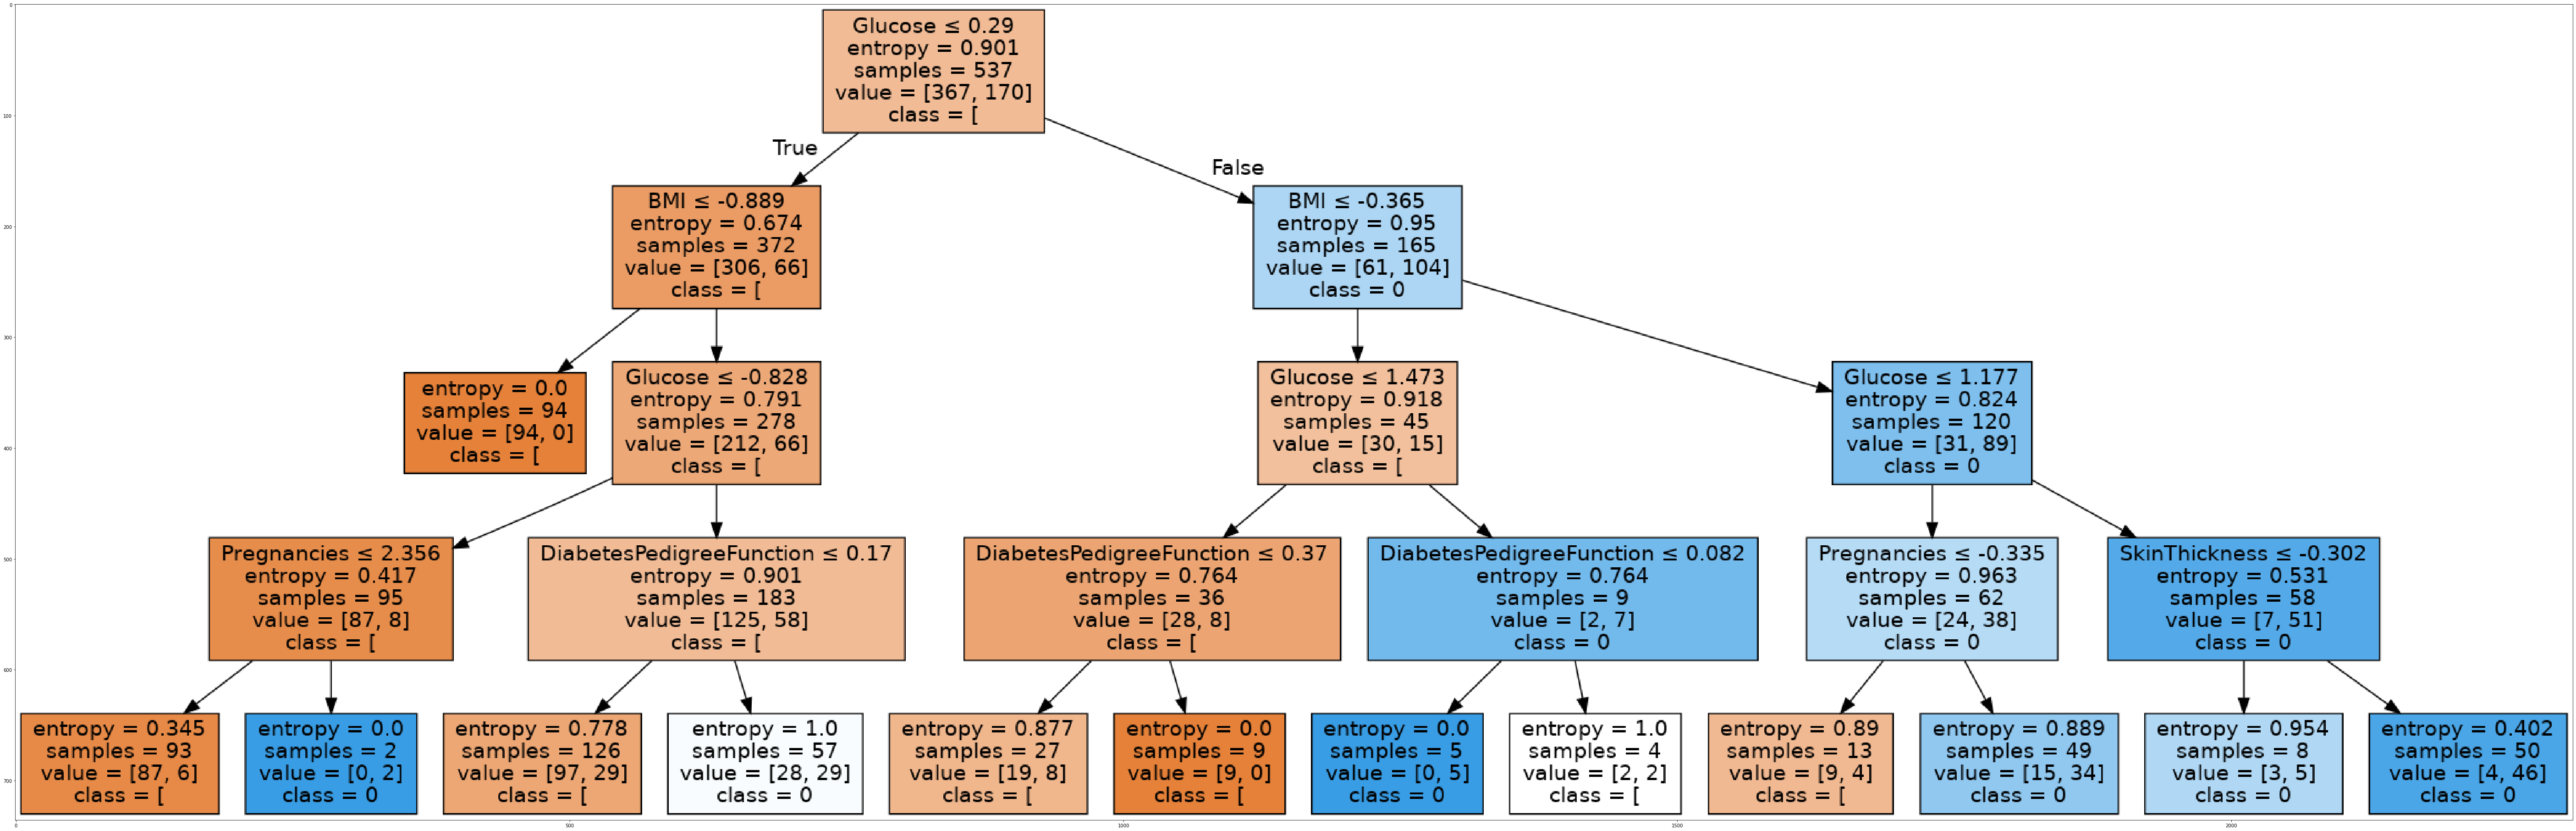

In [36]:
dot_data = StringIO()
filename = "DiabetesTree.png"
featureNames = df.columns[0:7]
targetNames = df["Outcome"].unique().tolist()
out=tree.export_graphviz(DiabetesTree,feature_names=featureNames, out_file=dot_data, class_names= str(np.unique(y_trainset)), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

In [35]:

pip install matplotlib==3.1.3

     |████████████████████████████████| 13.1 MB 16.6 MB/s eta 0:00:01
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.4.1
    Uninstalling matplotlib-3.4.1:
      Successfully uninstalled matplotlib-3.4.1
Note: you may need to restart the kernel to use updated packages.


In [37]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted') 

0.7434081070444707

# Support Vector Machine

In [38]:
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=4)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (614, 7) (614,)
Test set: (154, 7) (154,)


In [39]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(x_train, y_train) 

SVC()

In [40]:
yhat = clf.predict(x_test)
yhat [0:5]

array([0, 0, 0, 1, 0])

In [41]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [42]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           0       0.83      0.86      0.85       102
           1       0.71      0.65      0.68        52

    accuracy                           0.79       154
   macro avg       0.77      0.76      0.76       154
weighted avg       0.79      0.79      0.79       154

Confusion matrix, without normalization
[[88 14]
 [18 34]]


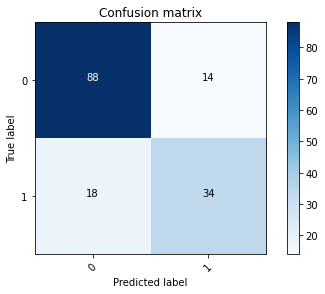

In [43]:
cnf_matrix = confusion_matrix(y_test, yhat)
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['0','1'],normalize= False,  title='Confusion matrix')

In [44]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted') 

0.79004995004995

# Logistic Regression

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(x_train,y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [46]:
yhat = LR.predict(x_test)
yhat

array([0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1])

In [47]:
yhat_prob = LR.predict_proba(x_test)
yhat_prob

array([[0.73, 0.27],
       [0.74, 0.26],
       [0.72, 0.28],
       [0.49, 0.51],
       [0.62, 0.38],
       [0.29, 0.71],
       [0.46, 0.54],
       [0.59, 0.41],
       [0.19, 0.81],
       [0.65, 0.35],
       [0.52, 0.48],
       [0.81, 0.19],
       [0.57, 0.43],
       [0.79, 0.21],
       [0.73, 0.27],
       [0.41, 0.59],
       [0.29, 0.71],
       [0.16, 0.84],
       [0.78, 0.22],
       [0.78, 0.22],
       [0.77, 0.23],
       [0.41, 0.59],
       [0.65, 0.35],
       [0.24, 0.76],
       [0.7 , 0.3 ],
       [0.42, 0.58],
       [0.76, 0.24],
       [0.53, 0.47],
       [0.51, 0.49],
       [0.65, 0.35],
       [0.21, 0.79],
       [0.85, 0.15],
       [0.61, 0.39],
       [0.82, 0.18],
       [0.27, 0.73],
       [0.56, 0.44],
       [0.58, 0.42],
       [0.42, 0.58],
       [0.8 , 0.2 ],
       [0.38, 0.62],
       [0.42, 0.58],
       [0.59, 0.41],
       [0.66, 0.34],
       [0.28, 0.72],
       [0.76, 0.24],
       [0.76, 0.24],
       [0.61, 0.39],
       [0.3 ,

In [48]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat))

[[87 15]
 [18 34]]


In [49]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84       102
           1       0.69      0.65      0.67        52

    accuracy                           0.79       154
   macro avg       0.76      0.75      0.76       154
weighted avg       0.78      0.79      0.78       154



In [50]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted') 

0.7840846196420884